# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
mydata = pd.read_csv("SBI.csv")

In [3]:
mydata.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


# Dataset Shape

In [4]:
mydata.shape

(1385, 7)

# Changing Date Format

In [5]:
mydata['Date'] = mydata['Date'].apply(lambda x : pd.to_datetime(x))

In [6]:
mydata.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


# Deriving Information Of the Dataset

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [8]:
mydata.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


# Checking for Null Values

In [9]:
mydata.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

# Changing Date as Index Column

In [10]:
mydata = mydata.set_index(mydata.columns[0])

In [11]:
mydata.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


# Ignoring the Index Column

In [12]:
mydata = mydata.sort_values(by=['Date'],ignore_index=True)

In [13]:
mydata.head()

,Price,Open,High,Low,Vol.,Change %
0,314.00,312.45,315.00,310.70,6.14M,0.69%
1,315.25,314.35,318.30,314.35,9.94M,0.40%
2,312.75,316.25,316.80,312.10,9.14M,-0.79%
3,299.90,310.00,311.10,298.70,15.33M,-4.11%
4,300.15,300.00,302.55,295.15,15.05M,0.08%


In [14]:
mydata.rename(columns={'Vol.': 'Vol','Change %':'Change_per'}, inplace=True)

In [15]:
mydata.head()

,Price,Open,High,Low,Vol,Change_per
0,314.00,312.45,315.00,310.70,6.14M,0.69%
1,315.25,314.35,318.30,314.35,9.94M,0.40%
2,312.75,316.25,316.80,312.10,9.14M,-0.79%
3,299.90,310.00,311.10,298.70,15.33M,-4.11%
4,300.15,300.00,302.55,295.15,15.05M,0.08%


# Visualization

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

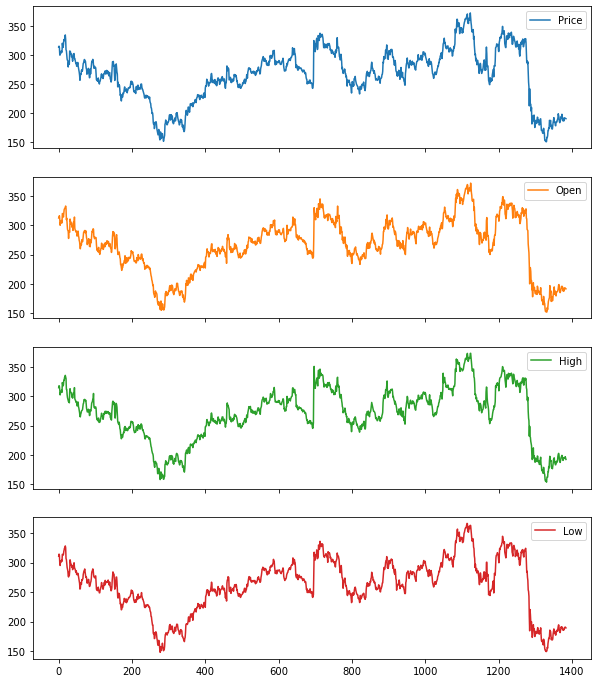

In [16]:
mydata.plot(subplots=True, figsize=(10,12))

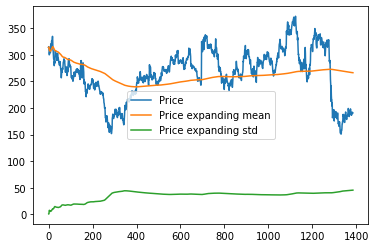

In [17]:
fig, ax = plt.subplots()
ax =mydata.Price.plot(label='Price')
ax = mydata.Price.expanding().mean().plot(label='Price expanding mean')
ax = mydata.Price.expanding().std().plot(label='Price expanding std')
ax.legend()

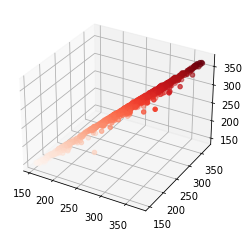

In [18]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ydata = mydata['Open']
xdata = mydata['High']
zdata = mydata['Low']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

# Checking Stationary

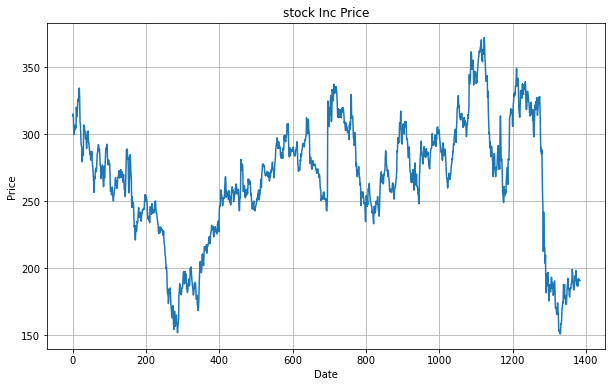

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(mydata['Price'])
plt.title("stock Inc Price")
plt.show()

In [20]:
mydata["s1"]=mydata["Price"]-mydata["Price"].shift(1)

In [21]:
mydata.head()

,Price,Open,High,Low,Vol,Change_per,s1
0,314.00,312.45,315.00,310.70,6.14M,0.69%,NaN
1,315.25,314.35,318.30,314.35,9.94M,0.40%,1.25
2,312.75,316.25,316.80,312.10,9.14M,-0.79%,-2.50
3,299.90,310.00,311.10,298.70,15.33M,-4.11%,-12.85
4,300.15,300.00,302.55,295.15,15.05M,0.08%,0.25


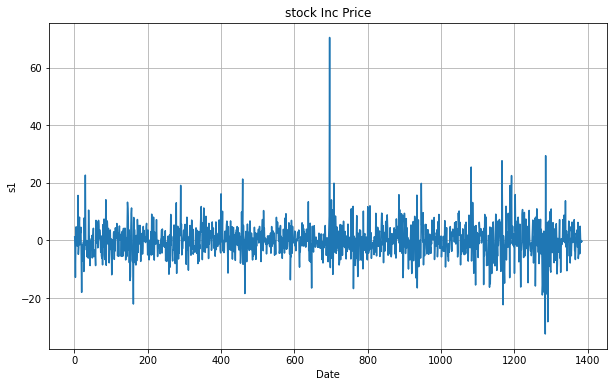

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("s1")
plt.plot(mydata['s1'])
plt.title("stock Inc Price")
plt.show()

In [23]:
mydata.dropna(inplace=True)

In [24]:
mydata.head()

,Price,Open,High,Low,Vol,Change_per,s1
1,315.25,314.35,318.30,314.35,9.94M,0.40%,1.25
2,312.75,316.25,316.80,312.10,9.14M,-0.79%,-2.50
3,299.90,310.00,311.10,298.70,15.33M,-4.11%,-12.85
4,300.15,300.00,302.55,295.15,15.05M,0.08%,0.25
5,304.85,305.00,306.50,302.35,8.94M,1.57%,4.70


# ADfuller Test - for checking stationary data

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
ADF_test = adfuller(mydata["s1"],autolag="AIC")

In [27]:
print(ADF_test)

(-13.79823385553192, 8.668623870321053e-26, 6, 1377, {'1%': -3.4351078301822016, '5%': -2.8636412316027577, '10%': -2.5678886927682663}, 8706.274782330333)


In [28]:
#Null Hypothesis H0 : No stationary
#Alternative Hypothesis : stationary

In [29]:
output = pd.DataFrame(ADF_test[0:4],index=["Test Statistics","p-value","Lag","number of observation"])

In [30]:
print(output)

                                  0
Test Statistics       -1.379823e+01
p-value                8.668624e-26
Lag                    6.000000e+00
number of observation  1.377000e+03


# KPSS Test

In [31]:
from statsmodels.tsa.stattools import kpss 

In [32]:
kpss_test = kpss(mydata['s1'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.078358
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\SHYAM\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Declaring Dependent and Independent Variables

In [33]:
Train=mydata["Price"].loc[:1108]

In [34]:
Test=mydata["Price"].loc[1109:]

# ARIMA

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

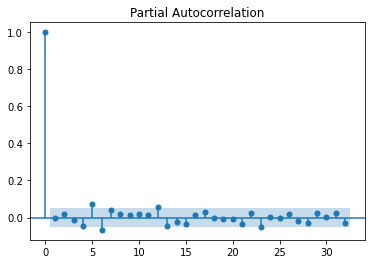

In [36]:
plot_pacf(mydata["s1"]); #p=0 - Autoregressive

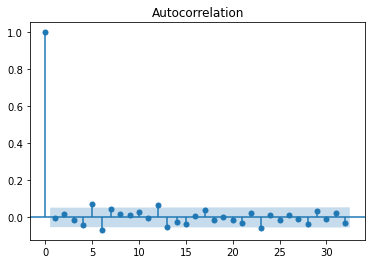

In [37]:
plot_acf(mydata["s1"]); #q=0  # An MA term is technically the error of the lagged forecast

In [38]:
model_arima= ARIMA(Train,order=(0,1,0))
model_arima_fit=model_arima.fit()

C:\Users\SHYAM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\SHYAM\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


# Forecasting

In [39]:
y_pred = model_arima_fit.forecast(steps=276)[2]

In [40]:
y_pred

array([[347.3821347 , 368.99537244],
       [342.94464017, 373.51037411],
       [339.54864777, 376.98387365],
       [336.69177654, 379.91825202],
       [334.17943345, 382.50810225],
       [331.91181934, 384.8532235 ],
       [329.82964894, 387.01290104],
       [327.89429462, 389.0257625 ],
       [326.07892552, 390.91863874],
       [324.36400626, 392.71106514],
       [322.73478922, 394.41778932],
       [321.17981695, 396.05026872],
       [319.68997796, 397.61761486],
       [318.25788466, 399.1272153 ],
       [316.87744863, 400.58515847],
       [315.54358164, 401.9965326 ],
       [314.25197963, 403.36564175],
       [312.99896335, 404.69616517],
       [311.78135825, 405.99127741],
       [310.59640259, 407.2537402 ],
       [309.44167599, 408.48597395],
       [308.31504308, 409.690114  ],
       [307.21460867, 410.86805555],
       [306.13868152, 412.02148984],
       [305.08574489, 413.1519336 ],
       [304.05443232, 414.26075332],
       [303.04350756, 415.34918522],
 

In [41]:
y_pred_1 = pd.DataFrame(y_pred)[0]

y_pred_1

0      347.382135
1      342.944640
2      339.548648
3      336.691777
4      334.179433
          ...    
271    190.463647
272    190.175077
273    189.887107
274    189.599732
275    189.312949
Name: 0, Length: 276, dtype: float64

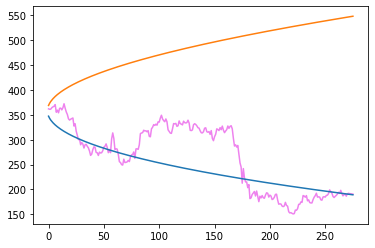

In [42]:
plt.plot(np.array(Test),color='violet')
plt.plot(model_arima_fit.forecast(steps=276)[2])

# Auto ARIMA

In [43]:
from pmdarima.arima import auto_arima

In [44]:
model = auto_arima(Train,start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,
                  d=None,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',
                  suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6929.192, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6925.343, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6927.194, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6927.195, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6923.398, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.396 seconds


# Mean Square Error

In [45]:
from sklearn.metrics import mean_squared_error as ms

In [46]:
mean_sqr=ms(Test,y_pred_1)
mean_sqr

2575.1589173641732

# Root Mean Square Error

In [47]:
root_mean_sqr=np.sqrt(mean_sqr)
root_mean_sqr

50.74602366061969

# Performing Decomposing

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

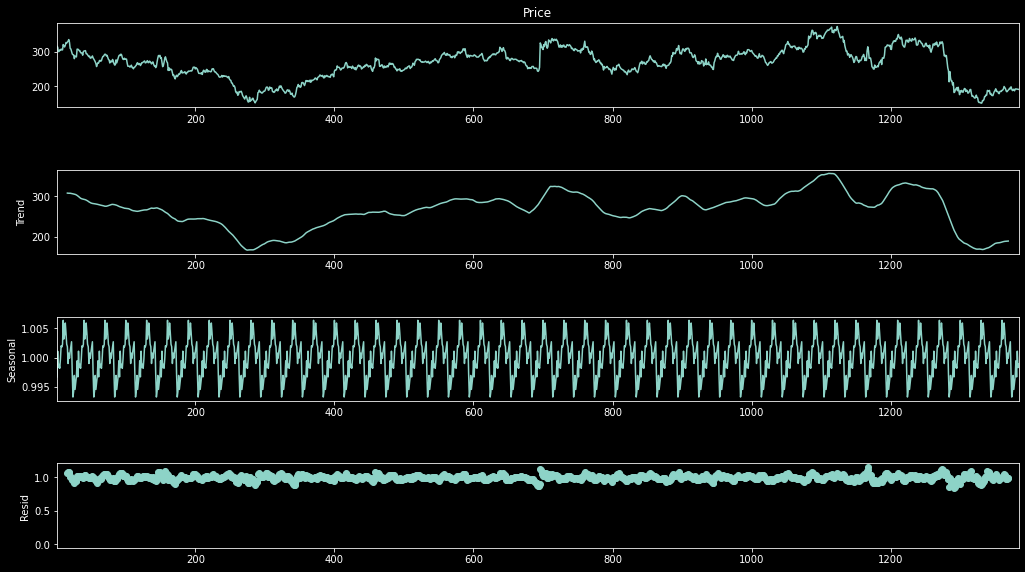

In [49]:
plt.style.use("dark_background")
result = seasonal_decompose(mydata['Price'],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

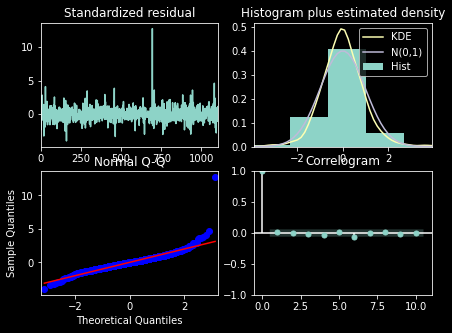

In [50]:
model.plot_diagnostics(figsize=(7,5))
plt.show()